min_degree=0 rows: 1105362
min_degree=5 rows: 1082142
Threshold 0: nodes=216562, edges=429176, density=0.000009
Threshold 5: nodes=208335, edges=407471, density=0.000009


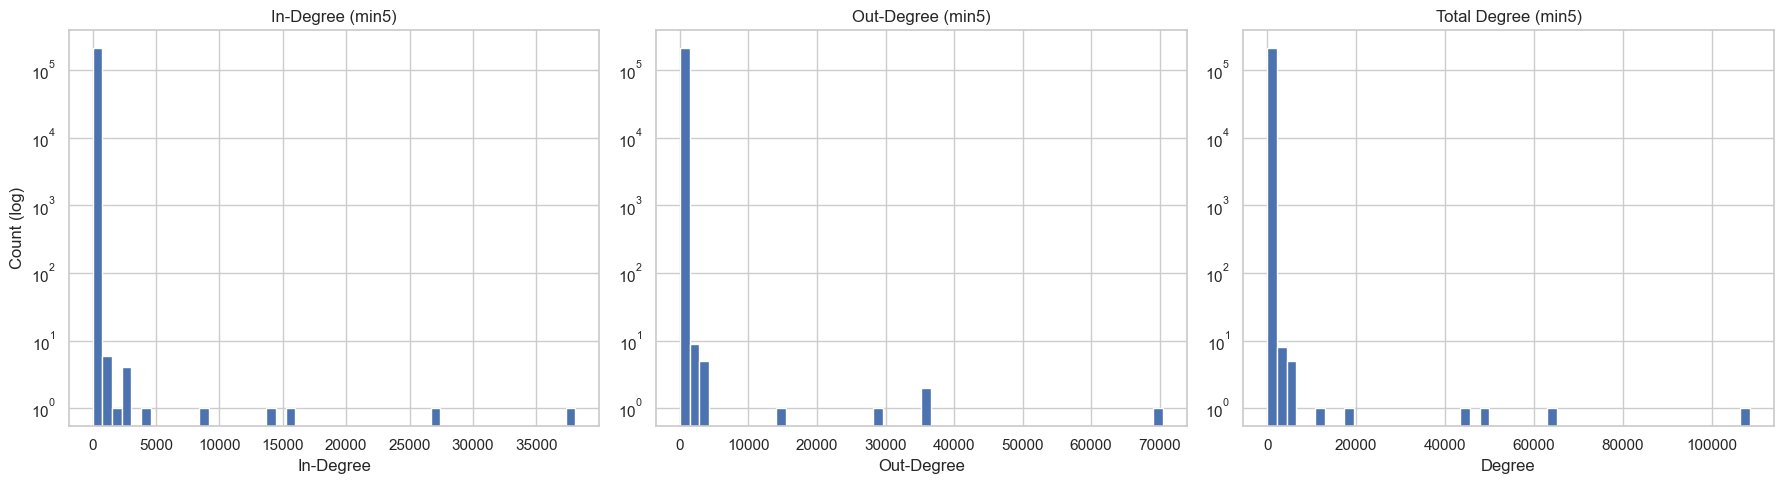

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

# 1. Load Cleaned Data
base = Path("../data/clean")
df_min0 = pd.read_pickle(base / "pepe_clean_min0.pkl")
df_min5 = pd.read_pickle(base / "pepe_clean_min5.pkl")
print(f"min_degree=0 rows: {len(df_min0)}")
print(f"min_degree=5 rows: {len(df_min5)}")

# 2. Build Graphs for Each Threshold
graphs = {}
for thr, df in [(0, df_min0), (5, df_min5)]:
    G = nx.DiGraph()
    for _, row in df.iterrows():
        G.add_edge(row['from_address'], row['to_address'])
    G.remove_edges_from(nx.selfloop_edges(G))
    graphs[thr] = G
    print(f"Threshold {thr}: nodes={G.number_of_nodes()}, "
          f"edges={G.number_of_edges()}, density={nx.density(G):.6f}")

# 3. Visualize Degree Distributions for min_degree=5
G5 = graphs[5]
in_deg = [d for _, d in G5.in_degree()]
out_deg = [d for _, d in G5.out_degree()]
total_deg = [d for _, d in G5.degree()]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].hist(in_deg, bins=50, log=True)
axes[0].set(title="In-Degree (min5)", xlabel="In-Degree", ylabel="Count (log)")
axes[1].hist(out_deg, bins=50, log=True)
axes[1].set(title="Out-Degree (min5)", xlabel="Out-Degree")
axes[2].hist(total_deg, bins=50, log=True)
axes[2].set(title="Total Degree (min5)", xlabel="Degree")
plt.tight_layout()
plt.show()
